In [29]:
%matplotlib inline
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt

tweets_data_path = '../data/tweets.json'

tweets_data = []
tweets_file = open(tweets_data_path, "r")

for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
#print tweets_data[0:0]



def get_tweet_text(tweet):
    #print tweet['text']
    return tweet['text']

columns = ['text', 'lang','location','followers_count','timestamp_ms'] #,'friends_count', 'country'
index = np.arange(len(tweets_data)) # array of numbers for the number of samples

tweets = pd.DataFrame(columns=columns, index = index)

#print tweets_data[0]
print (tweets_data[4].keys()) #['text']
print ('saved numbers of tweets: ', len(tweets_data),'\n Le dernier tweet est:', tweet['text'])



df = pd.DataFrame(columns=columns, index = index)



dict_keys(['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'entities', 'extended_entities', 'favorited', 'retweeted', 'possibly_sensitive', 'filter_level', 'lang', 'timestamp_ms'])
saved numbers of tweets:  11499 
 Le dernier tweet est: RT @GeorgeTakei: Congratulations to France! You appear not to have been affected by the effects of the present anomaly in the time-space co…


In [30]:
tweets['text'] = map(lambda tweet: tweet['text'], tweets_data)
tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
tweets['location'] = map(lambda tweet: tweet['user']['location'] if tweet['user']['location'] != None else u'Unknown', tweets_data)
tweets['followers_count'] = map(lambda tweet: tweet['user']['followers_count'], tweets_data)
tweets['timestamp_ms'] = map(lambda tweet: tweet['timestamp_ms'], tweets_data)

tweets['location'].value_counts()

<map object at 0x7f3dace91320>    11499
Name: location, dtype: int64

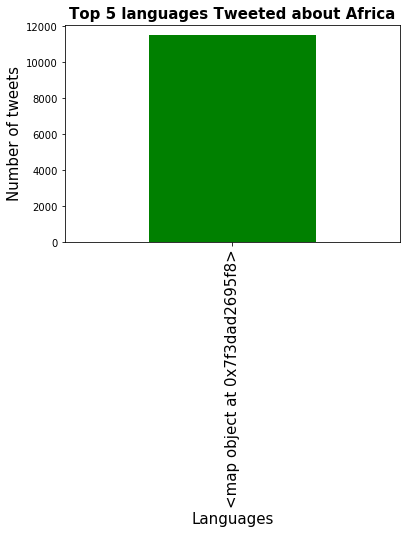

In [39]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages Tweeted about Africa', fontsize=15, fontweight='bold')
tweets_by_lang[:8].plot(ax=ax, kind='bar', color='g')

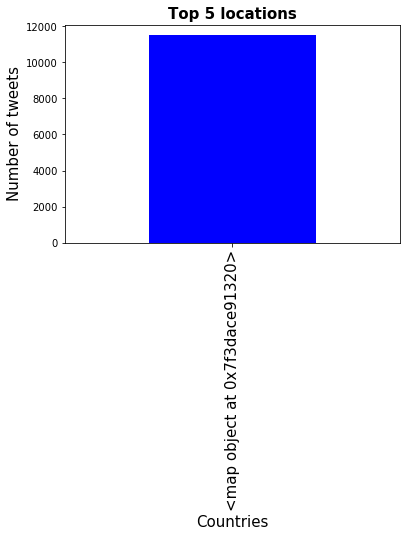

In [49]:
tweets_by_country = tweets['location'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 locations', fontsize=15, fontweight='bold')
tweets_by_country[0:8].plot(ax=ax, kind='bar', color='blue')

In [53]:
'''
Tweet Mining:
---------------
In this section we will mine the tweets to learn about interesting topics 
=======================================================
'''

import re #regtxt parser

#define topics 
keytopic=['France','Election','Macron', 'president']

#Create a function called word_in_text(word, text). 
#to return True if a word is found in text, otherwise it returns False.
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)        
    if match:
        #print text
        return True        
    return False

#add columns in the DataFrame to be True if a topic is found in the tweet else False
for itopic in range(len(keytopic)):
    tweets[keytopic[itopic]] = tweets['text'].apply(lambda tweet: word_in_text(keytopic[itopic], tweet))

#calculate the number of tweets for each  topic
tweets_by_topic = [tweets[keytopic[itopic]].value_counts()[True] for itopic in range(len(keytopic))]

#=========================================
#================ show plots============
#=========================================
#show a bar plot which illustrates the relative popularity the topics we consider
x_pos = list(range(len(keytopic)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_topic, width, alpha=1, color='g')

# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: By topic', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(keytopic)
plt.grid()

AttributeError: 'map' object has no attribute 'lower'

In [42]:
'''
Targeting relevant tweets with location filter
***Not yet working as desired
--------------------------------------------------------
'''

NewTopic=['crisis','solar','africa', 'senegal']

for itopic in range(len(NewTopic)):
    tweets[NewTopic[itopic]] = tweets['text'].apply(lambda tweet: word_in_text(NewTopic[itopic], tweet))


#find location where the NewTopic is tweeted
tweets_newtopic = [tweets[tweets[NewTopic[itopic]] == True]['timestamp_ms'].value_counts()[True] for itopic in range(len(NewTopic))]

#=========================================
#================ show plots============
#=========================================
#show a bar plot which illustrates the relative popularity the topics we consider
x_pos = list(range(len(NewTopic)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_newtopic, width, alpha=1, color='g')

# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: By topic', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(NewTopic)
plt.grid()

AttributeError: 'map' object has no attribute 'lower'

In [47]:
import time as time
from datetime import datetime
def unix_time(dt):
    epoch = datetime.utcfromtimestamp(0)
    delta = dt - epoch
    return delta.total_seconds()

def unix_time_millis(dt):
    return unix_time(dt) * 1000.0

In [48]:
def created_at_seconds(created_at="Sun May 25 04:10:55 +0000 2014"):
    '''
    This function changes tweeter created_at field to time in seconds since 1970
    '''

    tstamp=time.strptime(created_at,'%a %b %d %H:%M:%S +0000 %Y')
    ts = datetime.fromtimestamp(time.mktime(tstamp))
    return unix_time(ts)

In [46]:
print (created_at_seconds())

1400991055.0
